# Titanic Project 

In [782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [783]:
train=pd.read_csv(r'C:\Users\Shloka Daga SD03\titanic_pred\train.csv')
test=pd.read_csv(r'C:\Users\Shloka Daga SD03\titanic_pred\test.csv')

In [784]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kirkland, Rev. Charles Leonard",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [785]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [786]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [787]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There were  577  Male passengers
There were  314  Female passengers


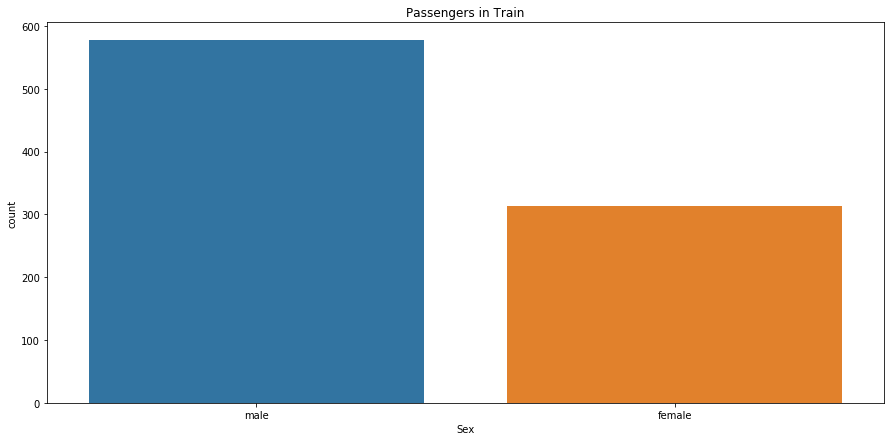

In [788]:
men=train.loc[train['Sex']=='male']
m=len(men)
print('There were ',m,' Male passengers')
female=train.loc[train['Sex']=='female']
f=len(female)
print('There were ',f,' Female passengers')
plt.figure(figsize=(15,7))
sns.countplot(train['Sex'])
plt.title('Passengers in Train')
plt.show()

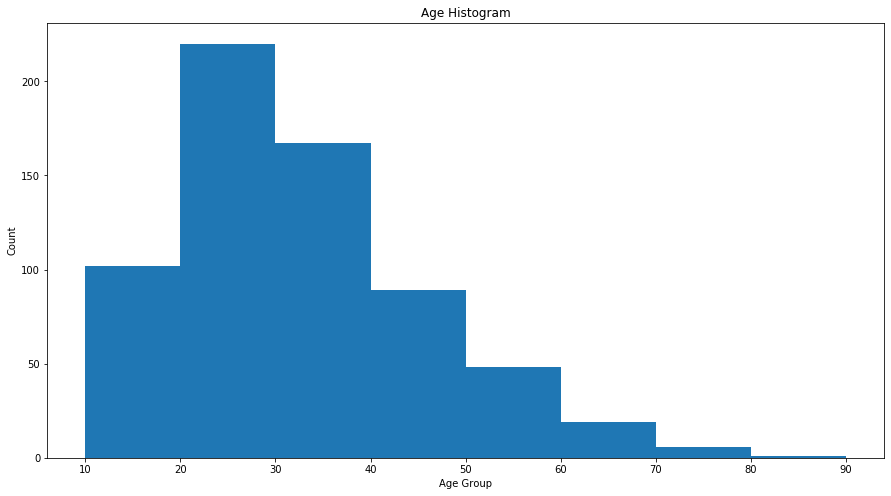

In [789]:
plt.figure(figsize=(15,8))
bins=[10,20,30,40,50,60,70,80,90]
plt.hist(train['Age'],bins=bins)
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.title('Age Histogram')
plt.show()

Male Survived percentage :  18.890814558058924
Female Survived percentage :  40.38128249566724


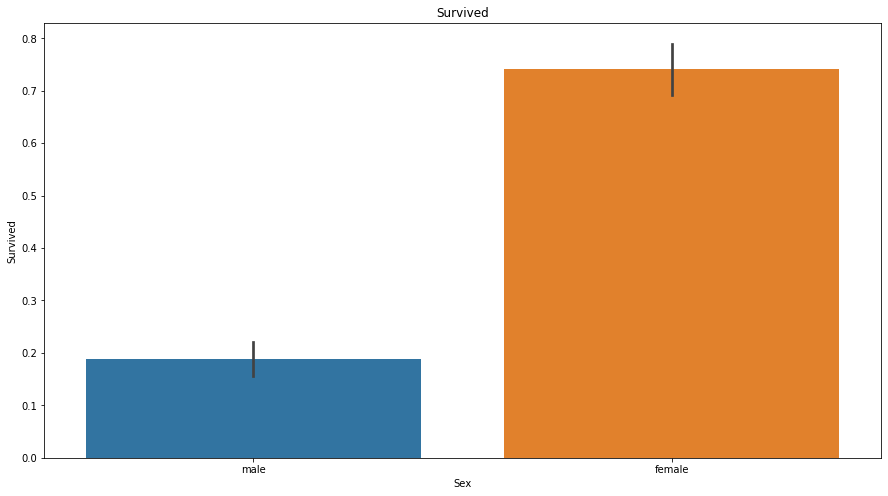

In [790]:
survived_male=train['Survived'][train['Sex']=='male'].value_counts()
per_m=(survived_male[1]*100)/m
print('Male Survived percentage : ',per_m)
survived_female=train['Survived'][train['Sex']=='female'].value_counts()
per_f=(survived_female[1]*100)/m
print('Female Survived percentage : ',per_f)
plt.figure(figsize=(15,8))
sns.barplot(x=train['Sex'],y=train['Survived'])
plt.title('Survived')
plt.show()

In [791]:
train["CabinBool"] = train["Cabin"].notnull().astype('int')
test["CabinBool"] = test["Cabin"].notnull().astype('int')

In [792]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [793]:
embarked=train.groupby(train['Embarked'])['Embarked'].count()
embarked

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [794]:
train['Embarked']=train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinBool        0
dtype: int64

In [795]:
embarked_mapping={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=test['Embarked'].map(embarked_mapping)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1


In [796]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [797]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [798]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [799]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1,1


In [800]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
age_grp=[-1,0,5,12,18,24,35,60,90]
label=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup']=pd.cut(train['Age'],age_grp,labels=label)
test['AgeGroup']=pd.cut(test['Age'],age_grp,labels=label)

In [801]:
train['AgeGroup']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Unknown
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [802]:
age_map={'Unknown':0,'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}
train['AgeGroup']=train['AgeGroup'].map(age_map)
test['AgeGroup']=test['AgeGroup'].map(age_map)

In [803]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,1,1,5


In [804]:
sex_mapping={'male':0,'female':1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [805]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,1,1,5


In [806]:
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [807]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,0,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,1,38.0,1,0,71.2833,2,1,3,6
2,3,1,3,1,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,1,35.0,1,0,53.1000,1,1,3,5
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,6,5
887,888,1,1,1,19.0,0,0,30.0000,1,1,2,4
888,889,0,3,1,-0.5,1,2,23.4500,1,0,2,0
889,890,1,1,0,26.0,0,0,30.0000,2,1,1,5


In [808]:
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass=test['Pclass'][x]
        test['Fare'][x]=train[train["Pclass"]==pclass]['Fare'].mean()

C:\Users\Shloka Daga SD03\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [809]:
train['FareBand']=pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,0,22.0,1,0,7.2500,1,0,1,4,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,3,6,4
2,3,1,3,1,26.0,0,0,7.9250,1,0,2,5,2
3,4,1,1,1,35.0,1,0,53.1000,1,1,3,5,4
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,6,5,2
887,888,1,1,1,19.0,0,0,30.0000,1,1,2,4,3
888,889,0,3,1,-0.5,1,2,23.4500,1,0,2,0,3
889,890,1,1,0,26.0,0,0,30.0000,2,1,1,5,3


In [810]:
train=train.drop(['Age','Fare'],axis=1)
teat=test.drop(['Age','Fare'],axis=1)
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,0,1,4,1
1,2,1,1,1,1,0,2,1,3,6,4
2,3,1,3,1,0,0,1,0,2,5,2
3,4,1,1,1,1,0,1,1,3,5,4
4,5,0,3,0,0,0,1,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,0,6,5,2
887,888,1,1,1,0,0,1,1,2,4,3
888,889,0,3,1,1,2,1,0,2,0,3
889,890,1,1,0,0,0,2,1,1,5,3


In [811]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
Title          0
AgeGroup       0
FareBand       0
dtype: int64

In [812]:
test=test.drop(['Fare','Age'],axis=1)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
Title          0
AgeGroup       0
FareBand       0
dtype: int64

In [813]:
from sklearn.model_selection import train_test_split
predictors=train.drop(['PassengerId','Survived'],axis=1)
target=train['Survived']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.22,random_state=0)

In [814]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_val)
acc_gaussian=round(accuracy_score(y_pred,y_val)*100,2)
print('Accuracy : ',acc_gaussian)

Accuracy :  78.68


In [815]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print('Accuracy : ',acc_logreg)

Accuracy :  79.7


In [816]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print('Accuracy : ',acc_randomforest)

Accuracy :  85.28


In [817]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print('Accuracy : ',acc_svc)

Accuracy :  83.25


In [818]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print('Accuracy : ',acc_gbk)

Accuracy :  83.76


In [819]:
model_df=pd.DataFrame({'Model':['GaussianNB','Logistic Regression','Random Forest Classifier','SVC','Gradient Boosting Classifier'],
                      'Accuracy':[acc_gaussian,acc_logreg,acc_randomforest,acc_svc,acc_gbk]})
model_df=model_df.sort_values('Accuracy',ascending=False,ignore_index=True)
model_df

,Model,Accuracy
0,Random Forest Classifier,85.28
1,Gradient Boosting Classifier,83.76
2,SVC,83.25
3,Logistic Regression,79.70
4,GaussianNB,78.68


In [820]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('final_prediction.csv', index=False)

We have made a prediction on the Survival of the passengers in the titanic

In final_prediction.csv, the Survived column consist of two values 0 and 1.
0 stands for Not survived.
1 stands for Survived